# CuDF - RAPIDS



# Instalação

> Método 1

Comando único de instalação: é possível instalar o RAPIDS por meio de um único comando, porém, será customizado de acordo com seu ambiente e sistema que você pode obter aqui:
https://docs.rapids.ai/install#selector - Ir até a seção “Install RAPIDS”

Para esse método você pode utilizar o Conda ou o Docker. O comando será gerado de acordo com a versão do Python ou do CUDA que você especificar. É importante enfatizar que dependendo do sistema e configuração esses método podem exigir configurações adicionais no ambiente de execução (nesse mesmo link acima tem mais informações sobre atenções que você deve ter para cada tipo de ambiente).

Caso esteja executando locamente, uma boa dica para deixar rodando sem se preocupar muito com configurações é usar os contêiners NGC da NVIDIA: https://catalog.ngc.nvidia.com/orgs/nvidia/containers/tensorflow


> Método 2

Já que estamos rodando no Colab, temos uma forma mais prática e rápida que é por meio de um repositório. Esse repositório contém um script (install_rapids.py) que vai instalar corretamente o RAPIDS de modo compatível com a GPU do Colab e sua respectiva versão CUDA. Podemos instalar todos os pacotes necessários no Colab usando apenas dois comandos.

Obs: há a possibilidade de algum dia o Colab sofrer alguma mudança e esse repositório não ser atualizado, ou outro motivo que faça com que os dois comandos abaixo não funcionem mais. Caso isso ocorra, atualizaremos aqui no Colab

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
!pip3 install --upgrade pip # Atualização em janeiro de 2024 - necessário para não ser gerado erro no comando .query do DataFrame

In [ ]:
!python rapidsai-csp-utils/colab/pip-install.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.6/499.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.5 MB/s eta 0:0

# Com o Pandas (CPU)


> Documentação: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


In [2]:
df = pd.DataFrame()
df['id'] = [0, 1, 2, 2, 3, 3, 3]
df['val'] = [float(i + 10) for i in range(7)]
print(df)

   id   val
0   0  10.0
1   1  11.0
2   2  12.0
3   2  13.0
4   3  14.0
5   3  15.0
6   3  16.0


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
soma = df['val'].sum()
print(soma)

91.0


# Com o cuDF (GPU)


In [5]:
import cudf
print(cudf.__version__)

24.02.02


In [6]:
df = cudf.DataFrame()
df['id'] = [0, 1, 2, 2, 3, 3, 3]
df['val'] = [float(i + 10) for i in range(7)]
print(df)

   id   val
0   0  10.0
1   1  11.0
2   2  12.0
3   2  13.0
4   3  14.0
5   3  15.0
6   3  16.0


In [7]:
type(df)

cudf.core.dataframe.DataFrame

In [8]:
soma = df['val'].sum()
print(soma)

91.0


# Familiarizando com o cuDF

## Criação de objeto



In [9]:
s = cudf.Series([1,2,None,3,4])
print(s)

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64


In [10]:
df = cudf.DataFrame({'a': list(range(10)),
                     'b': list(reversed(range(10))),
                     'c': list(range(10))})
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [11]:
df_p = pd.DataFrame({'a': [0,1,2,3], 'b': [0.1, 0.2, None, 0.3]})
type(df_p)

pandas.core.frame.DataFrame

In [12]:
df_c = cudf.DataFrame.from_pandas(df_p)
type(df_c)

cudf.core.dataframe.DataFrame

In [13]:
df_c

,a,b
0,0,0.1
1,1,0.2
2,2,<NA>
3,3,0.3


## Visualização dos dados

In [14]:
df.head(2)

,a,b,c
0,0,9,0
1,1,8,1


In [15]:
df.sort_values(by = 'b')

,a,b,c
9,9,0,9
8,8,1,8
7,7,2,7
6,6,3,6
5,5,4,5
4,4,5,4
3,3,6,3
2,2,7,2
1,1,8,1
0,0,9,0


## Seleção

In [16]:
df['a']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: a, dtype: int64

> Acessando diretamente pelo índice

In [17]:
print(df.loc[3:5, ['a', 'b']])

   a  b
3  3  6
4  4  5
5  5  4


In [18]:
df.iloc[0]

a    0
b    9
c    0
Name: 0, dtype: int64

In [19]:
df.iloc[0:3, 0:2]

,a,b
0,0,9
1,1,8
2,2,7


In [20]:
df[2:5]

,a,b,c
2,2,7,2
3,3,6,3
4,4,5,4


In [21]:
s[2:5]

2    <NA>
3       3
4       4
dtype: int64

## Condicionamentos e indexação booleana

In [22]:
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [23]:
print(df[df.b > 5])

   a  b  c
0  0  9  0
1  1  8  1
2  2  7  2
3  3  6  3


> Condição específica com operador lógico



In [24]:
df.query("b == 7")

,a,b,c
2,2,7,2


In [25]:
val = 8
df.query("b == @val")

,a,b,c
1,1,8,1


Outros operadores lógicos: `>`, `<`, `>=`, `<=`, `==`, e `!=`.

## Dados faltantes

In [26]:
s

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [27]:
print(s.fillna(999))

0      1
1      2
2    999
3      3
4      4
dtype: int64


In [28]:
print(s.dropna())

0    1
1    2
3    3
4    4
dtype: int64


## Estatísticas

In [29]:
import numpy as np # cuPy

In [30]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
s = cudf.Series(np.arange(10).astype(np.float32))
s

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float32

In [32]:
print(s.mean())
print(s.var())
print(s.std())

4.5
9.166666666666668
3.0276503540974917


In [33]:
print(df.describe())

/home/gustavocb/.local/lib/python3.10/site-packages/cudf/core/dataframe.py:5106: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/home/gustavocb/.local/lib/python3.10/site-packages/cudf/core/series.py:3319: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


              a         b         c
count  10.00000  10.00000  10.00000
mean    4.50000   4.50000   4.50000
std     3.02765   3.02765   3.02765
min     0.00000   0.00000   0.00000
25%     2.25000   2.25000   2.25000
50%     4.50000   4.50000   4.50000
75%     6.75000   6.75000   6.75000
max     9.00000   9.00000   9.00000


## Métodos de string

Você pode conferir a lista atualizada de métodos na documentação: https://docs.rapids.ai/api/cudf/nightly/api_docs/string_handling/#string-handling

In [34]:
s = cudf.Series(['A', 'B', 'C', 'Rapids', None, 'Gato', 'Cachorro'])
s

0           A
1           B
2           C
3      Rapids
4        <NA>
5        Gato
6    Cachorro
dtype: object

In [35]:
print(s.str.upper())
print()
print(s.str.lower())

0           A
1           B
2           C
3      RAPIDS
4        <NA>
5        GATO
6    CACHORRO
dtype: object

0           a
1           b
2           c
3      rapids
4        <NA>
5        gato
6    cachorro
dtype: object


In [36]:
print(s.str.byte_count())

0       1
1       1
2       1
3       6
4    <NA>
5       4
6       8
dtype: int32


In [37]:
print(s.str.contains('C|Gato', regex=True))

0    False
1    False
2     True
3    False
4     <NA>
5     True
6     True
dtype: bool


## Aplicando funções em um Series


In [38]:
s = cudf.Series([1,2,7,3,4])
s

0    1
1    2
2    7
3    3
4    4
dtype: int64

In [39]:
def add_10(num):
  return num + 10

In [40]:
add_10(1)

11

In [41]:
print(s.apply(add_10))

0    11
1    12
2    17
3    13
4    14
dtype: int64


## Concatenar


In [42]:
s = cudf.Series([1,2,None,3,5])
s

0       1
1       2
2    <NA>
3       3
4       5
dtype: int64

In [43]:
print(cudf.concat([s,s]))

0       1
1       2
2    <NA>
3       3
4       5
0       1
1       2
2    <NA>
3       3
4       5
dtype: int64


## Juntar

O RAPIDS suporta linguagem SQL - pesquisar por [BlazingSQL](https://github.com/BlazingDB/blazingsql)

In [44]:
df_a = cudf.DataFrame()
df_a['id'] = ['a', 'b', 'c', 'd', 'e']
df_a['vals_a'] = [float(i + 30) for i in range(5)]

df_b = cudf.DataFrame()
df_b['id'] = ['a', 'c', 'e']
df_b['vals_b'] = [float(i + 300) for i in range(3)]

In [45]:
df_a

,id,vals_a
0,a,30.0
1,b,31.0
2,c,32.0
3,d,33.0
4,e,34.0


In [46]:
df_b

,id,vals_b
0,a,300.0
1,c,301.0
2,e,302.0


In [47]:
merged = df_a.merge(df_b, on = ['id'], how = 'left')
print(merged)

  id  vals_a vals_b
0  a    30.0  300.0
1  c    32.0  301.0
2  e    34.0  302.0
3  b    31.0   <NA>
4  d    33.0   <NA>


## Agrupamento

Documentação Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [48]:
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [49]:
len(df)

10

In [50]:
df['ag_col1'] = [1 if x % 2 == 0 else 0 for x in range(len(df))]

In [51]:
df['ag_col2'] = [1 if x % 3 == 0 else 0 for x in range(len(df))]

In [52]:
df

,a,b,c,ag_col1,ag_col2
0,0,9,0,1,1
1,1,8,1,0,0
2,2,7,2,1,0
3,3,6,3,0,1
4,4,5,4,1,0
5,5,4,5,0,0
6,6,3,6,1,1
7,7,2,7,0,0
8,8,1,8,1,0
9,9,0,9,0,1


In [53]:
0 + 2 + 4 + 6 + 8

20

In [54]:
9 + 7 + 5 + 3 + 1

25

In [55]:
df.groupby('ag_col1').sum()

,a,b,c,ag_col2
ag_col1,,,,
1,20,25,20,2
0,25,20,25,2


In [56]:
df.groupby('ag_col1').agg({'a': 'max', 'b': 'mean', 'c': 'sum'})

,a,b,c
ag_col1,,,
1,8,5.0,20
0,9,4.0,25


In [57]:
df.groupby(['ag_col1', 'ag_col2']).agg({'a': 'max', 'b': 'min'})

a  b
ag_col1 ag_col2      
1       0        8  1
        1        6  3
0       0        7  2
        1        9  0

## Trabalhando com datas

In [58]:
date_df = cudf.DataFrame()
date_df['date'] = pd.date_range('01/31/2023', periods = 72, freq = 'W')
date_df['value'] = np.random.sample(len(date_df))
date_df

,date,value
0,2023-02-05,0.600582
1,2023-02-12,0.593905
2,2023-02-19,0.584212
3,2023-02-26,0.895009
4,2023-03-05,0.500389
...,...,...
67,2024-05-19,0.639736
68,2024-05-26,0.873919
69,2024-06-02,0.328345
70,2024-06-09,0.570318


In [59]:
date_search = cudf.to_datetime('2023-02-20')
date_df.loc[date_df.date <= date_search]

,date,value
0,2023-02-05,0.600582
1,2023-02-12,0.593905
2,2023-02-19,0.584212


In [60]:
date_df['day'] = date_df.date.dt.day
print(date_df.head())

        date     value  day
0 2023-02-05  0.600582    5
1 2023-02-12  0.593905   12
2 2023-02-19  0.584212   19
3 2023-02-26  0.895009   26
4 2023-03-05  0.500389    5


# Interoperabilidade com o cuPy e outras bibliotecas

> Documentação: https://docs.cupy.dev/en/stable/index.html

Equivalente a usar Pandas e NumPy

In [61]:
import cupy as cp

## Converter de cuDF para cuPy

Para a conversão, há diferentes formas. A principal e talvez mais usada é através da interface [DLpack](https://github.com/dmlc/dlpack), e também atualmente é a mais rápida.


In [62]:
nums = 10000
df = cudf.DataFrame({'a': range(nums),
                     'b': range(500, nums + 500),
                     'c': range(1000, nums + 1000)})
df

,a,b,c
0,0,500,1000
1,1,501,1001
2,2,502,1002
3,3,503,1003
4,4,504,1004
...,...,...,...
9995,9995,10495,10995
9996,9996,10496,10996
9997,9997,10497,10997
9998,9998,10498,10998


In [63]:
type(df)

cudf.core.dataframe.DataFrame

Modo 1: com o DLpack

In [64]:
array_cupy = cp.from_dlpack(df.to_dlpack())

In [65]:
type(array_cupy)

cupy.ndarray

Modo 2: Você pode converter um DataFrame ou Series para uma array CuPy usando o .values

In [66]:
array_cupy2 = df.values

In [67]:
type(array_cupy2)

cupy.ndarray

Modo 3: através do [CUDA array interface](https://numba.readthedocs.io/en/stable/cuda/cuda_array_interface.html), o que é possível através da funcionalidade `to_cupy` do cuDF.

In [68]:
array_cupy3 = df.to_cupy()

In [69]:
type(array_cupy3)

cupy.ndarray

## Converter de CuPy para cuDF

In [70]:
type(array_cupy)

cupy.ndarray

In [71]:
array_cupy

array([[    0,   500,  1000],
       [    1,   501,  1001],
       [    2,   502,  1002],
       ...,
       [ 9997, 10497, 10997],
       [ 9998, 10498, 10998],
       [ 9999, 10499, 10999]])

In [72]:
df_cudf = cudf.DataFrame(array_cupy)

In [73]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [74]:
df_cudf

,0,1,2
0,0,500,1000
1,1,501,1001
2,2,502,1002
3,3,503,1003
4,4,504,1004
...,...,...,...
9995,9995,10495,10995
9996,9996,10496,10996
9997,9997,10497,10997
9998,9998,10498,10998


## Outras conversões de tipos de dados

> DataFrame cuDF -> ndarray NumPy

Para converter um DataFrame cuDF para uma ndarray NumPy:

In [75]:
type(df)

cudf.core.dataframe.DataFrame

In [76]:
df_pandas = df.to_pandas()

In [77]:
type(df_pandas)

pandas.core.frame.DataFrame

> cuDF Series -> ndarray Numpy

E para converter um Series cuDF para uma ndarray NumPy:

In [78]:
df_numpy = df.to_numpy()

In [79]:
type(df_numpy)

numpy.ndarray

In [80]:
df_a = df['a']

In [81]:
df_a

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: a, Length: 10000, dtype: int64

In [82]:
type(df_a)

cudf.core.series.Series

In [83]:
df_a_numpy = df_a.to_numpy()

In [84]:
type(df_a_numpy)

numpy.ndarray

# Gravação e leitura de dados

In [85]:
df.to_csv('exemplo_cudf.csv', index = False)

In [87]:
df_loaded = cudf.read_csv('./exemplo_cudf.csv')
print(df_loaded)

         a      b      c
0        0    500   1000
1        1    501   1001
2        2    502   1002
3        3    503   1003
4        4    504   1004
...    ...    ...    ...
9995  9995  10495  10995
9996  9996  10496  10996
9997  9997  10497  10997
9998  9998  10498  10998
9999  9999  10499  10999

[10000 rows x 3 columns]


In [88]:
type(df_loaded)

cudf.core.dataframe.DataFrame

# UDF - Funções Definidas pelo Usuário

Por exemplo: em um kernel contendo um loop for, o loop nessa função se assemelha ao código de modo serial, mas é executado de modo paralelo em vários threads na GPU. Quando o kernel é invocado, os parâmetros da função correspondente à entrada/saída são alterados para melhorar o paralelismo da GPU. A função do kernel é compilada para a GPU usando numba.cuda, portanto, a função do kernel deve usar apenas as funcionalidades do Python que são suportados pelo Numba para CUDA
Funcionalidades suportadas aqui: https://numba.pydata.org/numba-doc/dev/cuda/cudapysupported.html

Podemos executar as UDFs em várias estruturas de dados:
* Series
* DataFrame
* Rolling Windows Series
* Groupby DataFrames
* CuPy NDArrays
* Numba DeviceNDArrays

### UDF em Series

Podemos executar UDFs em Series de duas maneiras:

* Com uma função python padrão e usando `cudf.Series.apply`

* Com um kernel Numba e usando a sintaxe `forall` do Numba

https://numba.pydata.org/numba-doc/dev/cuda/cudapysupported.html

Usar apply ou é mais simples, mas escrever um kernel Numba oferece a flexibilidade para construir funções mais complexas



> Com cudf.Series.apply

In [89]:
s = cudf.Series([1,2,7,3,4])
s

0    1
1    2
2    7
3    3
4    4
dtype: int64

In [90]:
type(s)

cudf.core.series.Series

In [91]:
def add_10(num):
  return num + 10

In [92]:
print(s.apply(add_10))

0    11
1    12
2    17
3    13
4    14
dtype: int64


### Funções com parâmetros escalares adicionais

In [93]:
def add(x, num):
  return x + num

In [94]:
s.apply(add, args=(10,))

0    11
1    12
2    17
3    13
4    14
dtype: int64

### Strings

Documentação: https://docs.rapids.ai/api/cudf/stable/api_docs/string_handling/#string-handling

In [95]:
s = cudf.Series(['A', 'B', 'C', 'Rapids', None, 'Gato', 'Cachorro'])
s

0           A
1           B
2           C
3      Rapids
4        <NA>
5        Gato
6    Cachorro
dtype: object

In [96]:
def udf_string(st):
  if len(st) > 0:
    if st.startswith("C"):
      return 1
    elif "d" in st:
      return 2
    else:
      return -1
  else:
    return 0

In [97]:
res = s.apply(udf_string)
print(res)

0   -1
1   -1
2    1
3    2
4    0
5   -1
6    1
dtype: int64


### Com kernels numba customizáveis

Documentação do CUDA: https://numba.readthedocs.io/en/stable/cuda/index.html

In [98]:
from cudf.datasets import randomdata
df = randomdata(nrows = 5, dtypes={"a": int, "b": int, "c": int})
df

,a,b,c
0,1068,987,970
1,1014,971,997
2,934,1024,1013
3,1005,999,946
4,998,1028,950


In [99]:
from numba import cuda

@cuda.jit
def multip(in_col, out_col, num):
  i = cuda.grid(1)
  if i < in_col.size:
    out_col[i] = in_col[i] * num

In [100]:
len(df['a'])

5

In [101]:
size = len(df['a'])
df['e'] = 0.0

In [102]:
df

,a,b,c,e
0,1068,987,970,0.0
1,1014,971,997,0.0
2,934,1024,1013,0.0
3,1005,999,946,0.0
4,998,1028,950,0.0


In [103]:
multip.forall(size)(df["a"], df["e"], 10.0)

/home/gustavocb/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [104]:
df

,a,b,c,e
0,1068,987,970,10680.0
1,1014,971,997,10140.0
2,934,1024,1013,9340.0
3,1005,999,946,10050.0
4,998,1028,950,9980.0


## UDF em DataFrames

Existem várias maneiras de usar UDFs em dataframes, que essencialmente equivalem a UDFs que esperam múltiplas colunas como entrada:

1. Usando o cudf.DataFrame.apply - que funciona semelhante ao pd.DataFrame.apply

2. Usando o cudf.DataFrame.apply_rows - que é um wrapper do numba portanto e espera um kernel numba

3. Usando o cudf.DataFrame.apply_chunks, que é semelhante ao cudf.DataFrame.apply_rows, mas oferece controle de mais baixo nível.

### Com o cudf.DataFrame.apply


In [105]:
def udf_add(row):
  return row['a'] + row['b']

In [106]:
df = cudf.DataFrame({"a": [1,2,3,4], "b": [5,6,cudf.NA,8]})
df

,a,b
0,1,5
1,2,6
2,3,<NA>
3,4,8


In [107]:
df.apply(udf_add, axis = 1)

0       6
1       8
2    <NA>
3      12
dtype: int64

In [108]:
def udf_add(row):
  x = row['a']
  if x is cudf.NA:
    return 0
  else:
    return x + 1

In [109]:
df = cudf.DataFrame({"a": [1, cudf.NA, 3]})
df

,a
0,1
1,<NA>
2,3


In [110]:
# df.to_pandas(nullable=True).apply(udf_add, axis=1)
df.apply(udf_add, axis = 1)

0    2
1    0
2    4
dtype: int64

In [111]:
def f(row):
  return row['a'] * (row['b'] + (row['c'] / row['d'])) % row['e']

In [112]:
df = cudf.DataFrame(
    {
        "a": [1, 2, 3],
        "b": [4, 5, 6],
        "c": [7, 7, cudf.NA],
        "d": [8, 9, 1],
        "e": [7, 1, 6],
    }
)

In [113]:
df

,a,b,c,d,e
0,1,4,7,8,7
1,2,5,7,9,1
2,3,6,<NA>,1,6


In [114]:
df.apply(f, axis = 1)

0          4.875
1    0.555555556
2           <NA>
dtype: float64

### Com apply_rows e apply_chunks - Kernels Numba para DataFrames


In [115]:
def add_cond(x, y, out):
  for i, (a, e) in enumerate(zip(x, y)):
    if a > 0:
      out[i] = a + e
    else:
      out[i] = a

In [116]:
df

,a,b,c,d,e
0,1,4,7,8,7
1,2,5,7,9,1
2,3,6,<NA>,1,6


In [117]:
df = df.apply_rows(add_cond, incols={"a": "x", "e": "y"}, outcols={"out": np.float64}, kwargs={})

In [118]:
df

,a,b,c,d,e,out
0,1,4,7,8,7,8.0
1,2,5,7,9,1,3.0
2,3,6,<NA>,1,6,9.0


### UDF em arrays cuPy

In [119]:
import cupy as cp
s = cudf.Series([1.0, 2, 3, 4, 7])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    7.0
dtype: float64

In [120]:
type(s)

cudf.core.series.Series

In [121]:
cp_array = cp.asarray(s)
cp_array

array([1., 2., 3., 4., 7.])

In [122]:
type(cp_array)

cupy.ndarray

In [123]:
@cuda.jit
def multip_5x(x, out):
  i = cuda.grid(1)
  if i < x.size:
    out[i] = x[i] * 5

In [124]:
res = cudf.Series(cp.zeros(len(s), dtype="int32"))
res

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [125]:
s.shape[0]

5

In [126]:
multip_5x.forall(s.shape[0])(s, res)
res

/home/gustavocb/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


0     5
1    10
2    15
3    20
4    35
dtype: int32

In [127]:
type(res)

cudf.core.series.Series

In [128]:
res_cp = res.to_cupy()

In [129]:
res_cp

array([ 5, 10, 15, 20, 35], dtype=int32)

In [130]:
type(res_cp)

cupy.ndarray

# Comparação de desempenho



In [131]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [132]:
!nvidia-smi

Wed Apr 10 08:43:42 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.40.06              Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        On  |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8              8W /  170W |    1139MiB /  12288MiB |     27%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [133]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  24
  On-line CPU(s) list:   0-23
Vendor ID:               GenuineIntel
  Model name:            13th Gen Intel(R) Core(TM) i7-13700
    CPU family:          6
    Model:               183
    Thread(s) per core:  2
    Core(s) per socket:  12
    Socket(s):           1
    Stepping:            1
    BogoMIPS:            4223.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscal
                         l nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopo
                         logy tsc_reliable nonstop_tsc cpuid pni pclmulqdq vmx s
                         sse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt tsc_dea
                         dline_timer aes xsave avx f16c rdrand hypervi

In [134]:
import os
import time
import timeit
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [135]:
num_rows = 10_000_000
df_pandas = pd.DataFrame(
    {
        "nums": np.random.randint(-1000, 1000, num_rows, dtype="int64"),
        "companies": np.random.choice(["Google", "Amazon", "Apple", "Microsoft", "Facebook"], size=num_rows)
    }
)

In [136]:
df_pandas

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
9999995,-385,Microsoft
9999996,-475,Amazon
9999997,-761,Microsoft
9999998,-680,Apple


In [137]:
type(df_pandas)

pandas.core.frame.DataFrame

In [138]:
%timeit
df_cudf = cudf.from_pandas(df_pandas)
df_cudf

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
9999995,-385,Microsoft
9999996,-475,Amazon
9999997,-761,Microsoft
9999998,-680,Apple


In [139]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [140]:
def timeit_pandas_cudf(pd_obj, cudf_obj, func, **kwargs):
  t_pandas = timeit.timeit(lambda: func(pd_obj), **kwargs)
  t_cudf = timeit.timeit(lambda: func(cudf_obj), **kwargs)
  return t_pandas, t_cudf

## Aceleração para diferentes operações



### Aceleração para value_counts


In [147]:
df_pandas.value_counts()

nums  companies
 70   Amazon       1153
 385  Facebook     1125
-298  Google       1115
-883  Google       1114
 318  Apple        1108
                   ... 
-87   Facebook      894
 523  Microsoft     892
-392  Google        888
 821  Apple         886
-53   Amazon        880
Length: 10000, dtype: int64

In [148]:
pandas_counts, cudf_counts = timeit_pandas_cudf(df_pandas, df_cudf, lambda df: df.value_counts(), number=30)

In [149]:
pandas_counts, cudf_counts

(15.195052095999927, 1.3233899090000705)

In [150]:
44.36997717599979 + 0.736092317999919

45.10606949399971

### Aceleração para concat

In [151]:
pandas_concat = timeit.timeit(lambda: pd.concat([df_pandas, df_pandas, df_pandas]), number=30)

In [152]:
cudf_concat = timeit.timeit(lambda: cudf.concat([df_cudf, df_cudf, df_cudf]), number=30)

In [153]:
pandas_concat, cudf_concat

(11.593132375000096, 1.449064767999971)

### Aceleração para groupby


In [154]:
pandas_groupby, cudf_groupby = timeit_pandas_cudf(df_pandas, df_cudf,
                                                  lambda df: df.groupby("companies").agg(["min", "max", "mean"]),
                                                  number=30)

In [155]:
pandas_groupby, cudf_groupby

(11.360115704999771, 1.0238424290000694)

### Aceleração para merge

In [156]:
min_rows = int(num_rows / 10)
min_rows

1000000

In [157]:
df_pandas = df_pandas.head(min_rows)
df_cudf = cudf.from_pandas(df_pandas)

In [158]:
df_pandas

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
999995,-352,Microsoft
999996,147,Microsoft
999997,538,Amazon
999998,-921,Google


In [159]:
df_cudf

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
999995,-352,Microsoft
999996,147,Microsoft
999997,538,Amazon
999998,-921,Google


In [160]:
pandas_merge, cudf_merge = timeit_pandas_cudf(df_pandas, df_cudf, lambda df: df.merge(df), number=30)

In [161]:
pandas_merge, cudf_merge

(65.40132251900013, 14.86716741400005)

In [162]:
!nvidia-smi

Wed Apr 10 08:49:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.40.06              Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        On  |   00000000:01:00.0  On |                  N/A |
| 30%   55C    P2            104W /  170W |    1377MiB /  12288MiB |     91%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

> Comparando os resultados obtidos

In [163]:
desempenho_df = pd.DataFrame(
    {
        "sppedup cudf vs. pandas": [
            pandas_counts / cudf_counts,
            pandas_concat / cudf_concat,
            pandas_groupby / cudf_groupby,
            pandas_merge / cudf_merge,
        ],
    },
    index = ["value counts", "concat", "groupby", "merge"]
)

In [164]:
desempenho_df

,sppedup cudf vs. pandas
value counts,11.481916
concat,8.000424
groupby,11.095570
merge,4.399044


> Plotando em um gráfico único

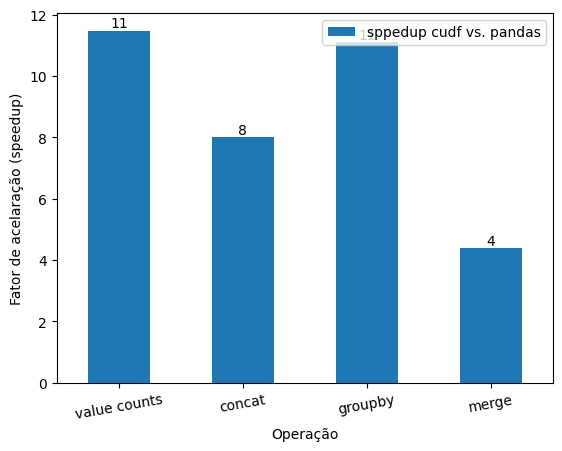

In [165]:
ax = desempenho_df.plot.bar(
    rot=10,
    xlabel="Operação",
    ylabel="Fator de acelaração (speedup)"
)
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.show()

## Aceleração para operações com strings

In [166]:
num_rows = 10_000_000
pandas_s = pd.Series(np.random.choice(["Google", "Amazon", "Apple", "Microsoft", "Netflix"], size=num_rows))

In [167]:
type(pandas_s)

pandas.core.series.Series

In [168]:
pandas_s

0          Netflix
1          Netflix
2          Netflix
3           Amazon
4           Google
            ...   
9999995     Google
9999996     Google
9999997     Google
9999998    Netflix
9999999     Amazon
Length: 10000000, dtype: object

In [169]:
cudf_s = cudf.from_pandas(pandas_s)

In [170]:
cudf_s

0          Netflix
1          Netflix
2          Netflix
3           Amazon
4           Google
            ...   
9999995     Google
9999996     Google
9999997     Google
9999998    Netflix
9999999     Amazon
Length: 10000000, dtype: object

In [171]:
type(cudf_s)

cudf.core.series.Series

### Aceleração para upper

In [172]:
pandas_upper, cudf_upper = timeit_pandas_cudf(pandas_s, cudf_s, lambda s: s.str.upper(), number=20)

In [173]:
pandas_upper, cudf_upper

(18.20837082099979, 0.5514569209999536)

### Aceleração para contains

In [174]:
pandas_contains, cudf_contains = timeit_pandas_cudf(pandas_s, cudf_s,
                                                    lambda s: s.str.contains(r"[0-9][a-z]"), number = 20) # 1e, 4i

In [175]:
pandas_contains, cudf_contains

(23.61489330800032, 0.6178835310001887)

### Aceleração para isalpha

In [176]:
pandas_isalpha, cudf_isalpha = timeit_pandas_cudf(pandas_s, cudf_s, lambda s: s.str.isalpha(), number=20)

In [177]:
pandas_isalpha, cudf_isalpha

(13.282853873000022, 0.15677674499966088)

> Comparando os resultados obtidos


In [178]:
performance_df = pd.DataFrame(
    {
        "speedup cudf vs. pandas": [
            pandas_upper / cudf_upper,
            pandas_contains / cudf_contains,
            pandas_isalpha / cudf_isalpha,
        ],
    },
    index=["upper", "contains", "isalpha"],
)

In [179]:
performance_df

,speedup cudf vs. pandas
upper,33.018664
contains,38.219004
isalpha,84.724644


> Plotando em um gráfico único

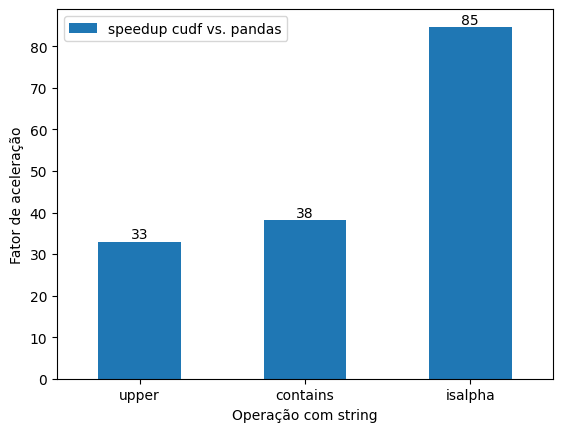

In [180]:
ax = performance_df.plot.bar(
    xlabel="Operação com string",
    ylabel="Fator de aceleração",
    rot=0,
)
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.show()

> Algumas diferenças adicionais entre CuDF e Pandas

* https://docs.rapids.ai/api/cudf/stable/user_guide/pandas-comparison/

# Executando localmente

Máquina local: um modo prático de deixar o ambiente funcionando é pelo NGC - Repositório de modelos de redes neurais e de containers da NVIDIA.

* Para rodar em sua máquina, basta seguir os passos
https://catalog.ngc.nvidia.com/orgs/nvidia/teams/rapidsai/containers/rapidsai
  * Tem o Base e o Runtime - esse último vem junto com alguns exemplos de código dentro
  * Pré-requisitos: Docker CE, Drive de CUDA (da sua GPU), plugin da NVIDIA do docker (para o docker conseguir acessar a GPU); e então, execute os comandos listados.
  * Obs: Ao instalar o driver da NVIDIA da placa de vídeo, tem que aparecer detalhes sobre sua GPU ao executar o comando:
!nvidia-smi
assim que sabemos se o driver foi instalado corretamente.

* Ver o comando de instalação no link (vai depender do SO e ambiente)

